In [19]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Wine dataset

#### Dataset column names
0. Wine class
1. Alcohol: The alcohol content of the wine, measured in % vol.
2. Malic acid: The amount of malic acid in the wine, measured in g/l.
3. Ash: The ash content of the wine, measured in g/l.
4. Alcalinity of ash: The alkalinity of the ash in the wine, measured in g/l.
5. Magnesium: The amount of magnesium in the wine, measured in mg/l.
6. Total phenols: The total phenol content of the wine, measured in mg/l.
7. Flavanoids: The flavanoid content of the wine, measured in mg/l.
8. Nonflavanoid phenols: The nonflavanoid phenol content of the wine, measured in mg/l.
9. Proanthocyanins: The proanthocyanin content of the wine, measured in mg/l.
10. Color intensity: The color intensity of the wine, measured in absorbance units.
11. Hue: The hue of the wine, measured in absorbance units.
12. OD280/OD315 of diluted wines: The OD280/OD315 ratio of the diluted wine, which is a measure of the wine's color intensity.
13. Proline: The proline content of the wine, measured in mg/l.

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

df = pd.read_csv(url, header=None)
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

#### Dataset preview and descriptive statistics

In [6]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Check for NaN values

In [9]:
df.isna().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

#### Exploring data distributions

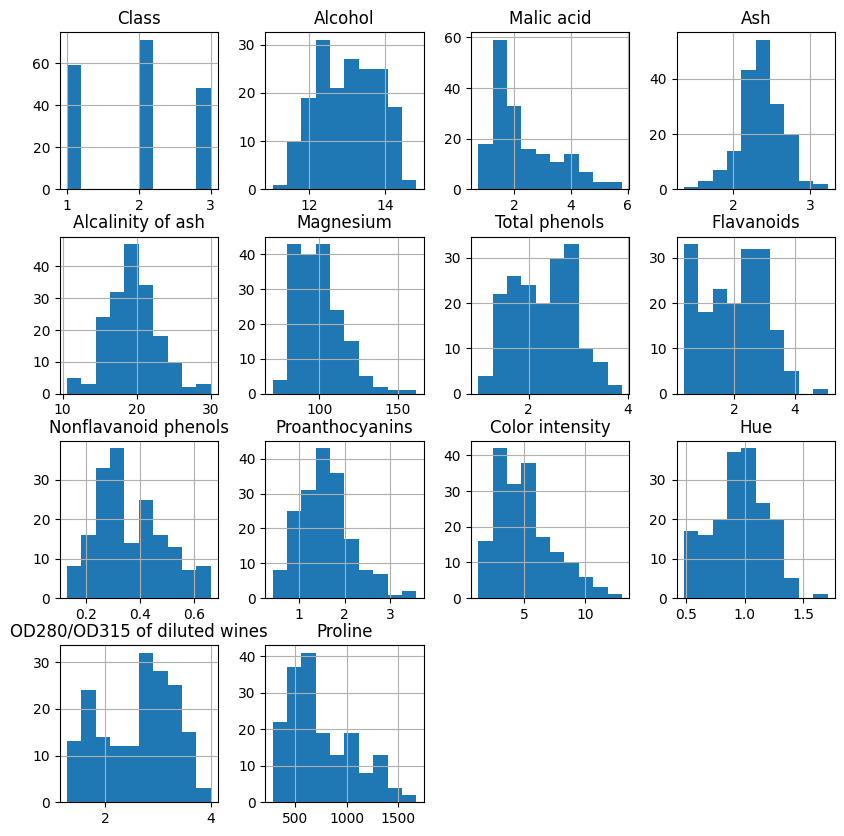

In [11]:
df.hist(figsize=(10,10))
plt.show()

#### Visualizing the relationships between the different features

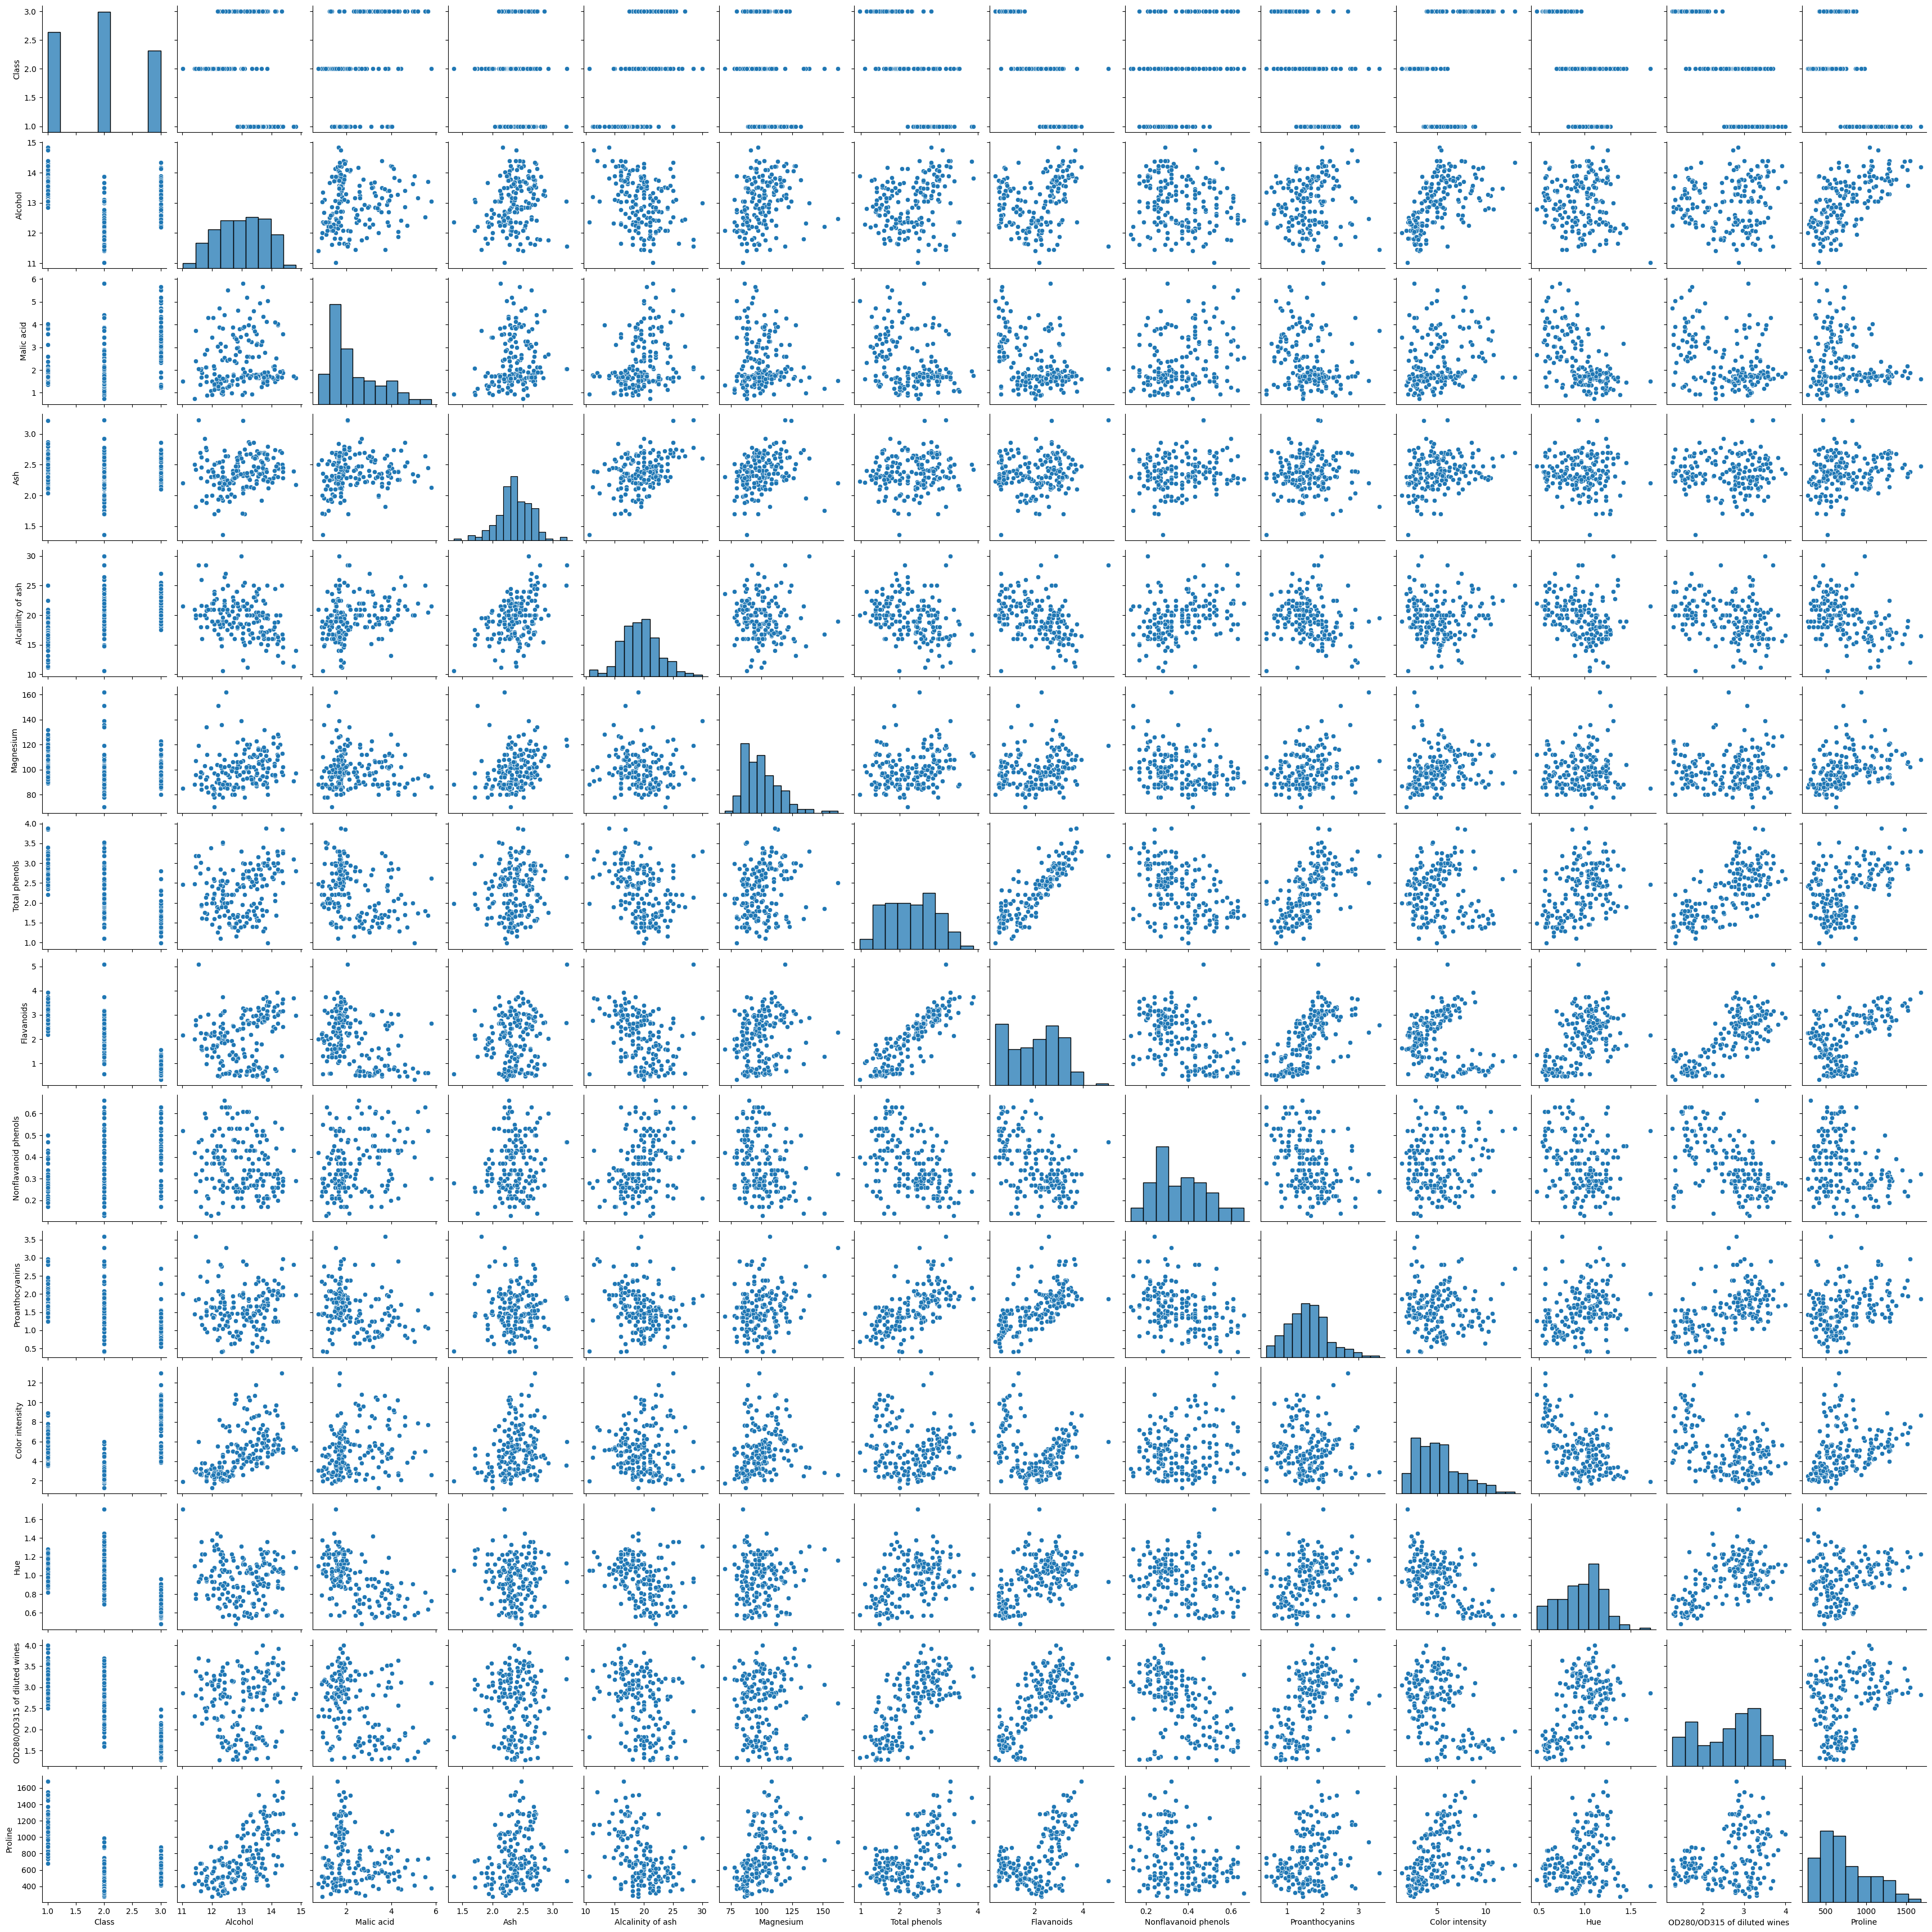

In [11]:
sns.pairplot(df)
plt.show()

#### Visualizing the correlations

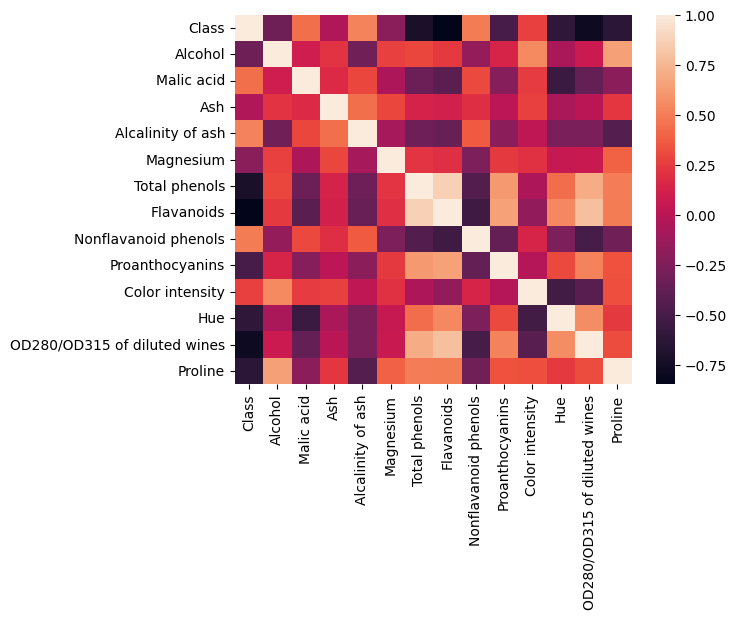

In [12]:
correlations = df.corr()
sns.heatmap(correlations, annot=False)
plt.show()

In [160]:
# Separate the features from the class labels
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

# Perform PCA on the features
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [155]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print(explained_variance_ratio)

[0.36198848 0.1920749  0.11123631]


In [112]:
cc = ColorConverter()
colors = [cc.to_rgba(c) for c in np.random.rand(len(np.unique(y)), 3)]

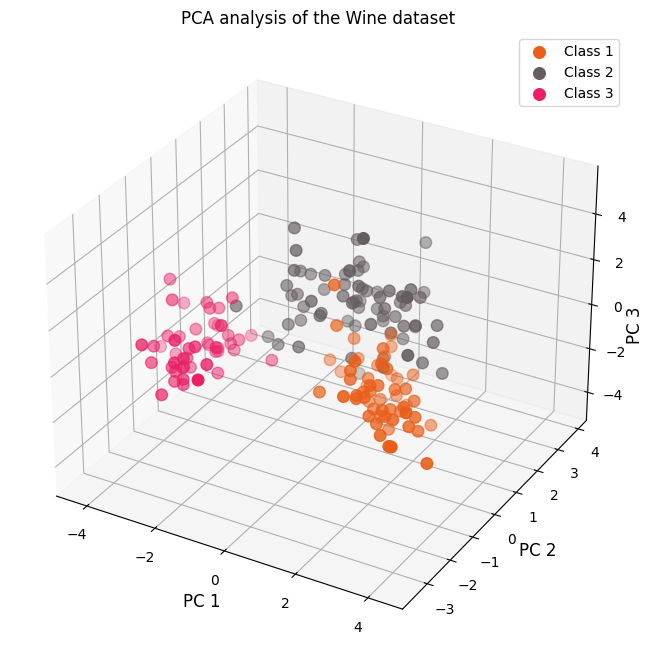

In [189]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
for i, label in enumerate(np.unique(y)):
    ax.scatter(X_pca[y==label, 0], X_pca[y==label, 1], X_pca[y==label, 2], color=colors[i], s=70)

# Add labels to the axes
ax.set_xlabel('PC 1', fontsize=12, labelpad=5)
ax.set_ylabel('PC 2', fontsize=12, labelpad=5)
ax.text2D(1.0, 0.5, 'PC 3', transform=ax.transAxes, fontsize=12, rotation=90)

# Add a legend to the plot
labels = ['Class 1', 'Class 2', 'Class 3']
ax.legend(labels)
ax.set_title('PCA analysis of the Wine dataset')
# Show the plot
plt.show()

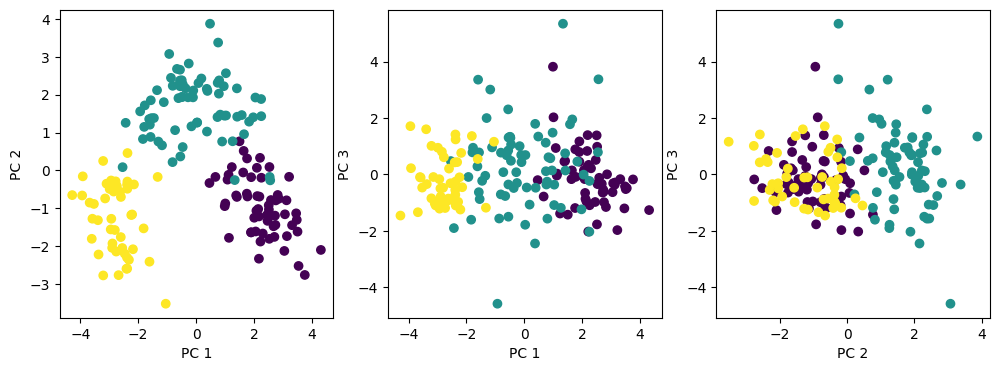

In [174]:
import matplotlib.pyplot as plt

# Extract the first three principal components
#X_pca = pca.transform(X)[:,:3]

# Create a 3D scatter plot with multiple subplots
fig, ax = plt.subplots(1, 3, figsize=(12,4))

# Scatter plot of PC 1 vs PC 2
ax[0].scatter(X_pca[:,0], X_pca[:,1], c=y)
ax[0].set_xlabel('PC 1')
ax[0].set_ylabel('PC 2')

# Scatter plot of PC 1 vs PC 3
ax[1].scatter(X_pca[:,0], X_pca[:,2], c=y)
ax[1].set_xlabel('PC 1')
ax[1].set_ylabel('PC 3')

# Scatter plot of PC 2 vs PC 3
ax[2].scatter(X_pca[:,1], X_pca[:,2], c=y)
ax[2].set_xlabel('PC 2')
ax[2].set_ylabel('PC 3')

# Show the plot
plt.show()


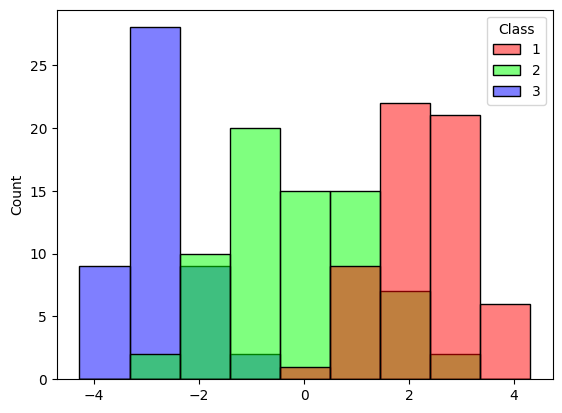

In [157]:
# Create a histogram of the first principal component
sns.histplot(x=X_pca[:, 0], hue=y, palette=[(1, 0, 0), (0, 1, 0), (0, 0, 1)])

# Show the plot
plt.show()

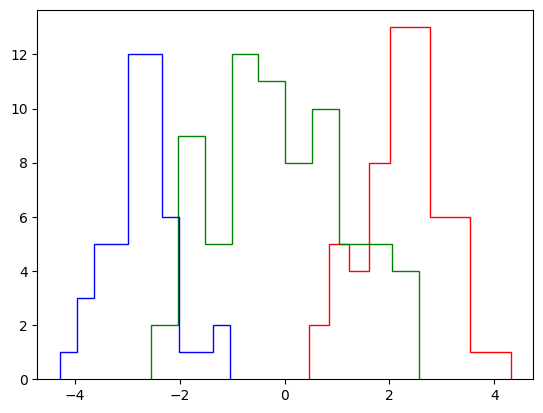

In [158]:
# Select the samples for each class
class_1 = X_pca[y == 1, 0]
class_2 = X_pca[y == 2, 0]
class_3 = X_pca[y == 3, 0]

# Create a histogram for each class
plt.hist(class_1, histtype='step', color='red')
plt.hist(class_2, histtype='step', color='green')
plt.hist(class_3, histtype='step', color='blue')

# Show the plot
plt.show()

A violin plot is a graphical representation of the distribution of a continuous variable that shows the distribution of the data as a kernel density estimate plotted as a curve, with a box plot and/or a quartile plot drawn inside the violins.

In a violin plot, the width of each violin represents the relative frequency of the data points within the corresponding bin, and the y-axis shows the values of the variable. The horizontal lines in the violins represent the minimum and maximum values of the data, and the box plot or quartile plot inside the violins shows the median, first quartile, and third quartile of the data.

To interpret the results of a violin plot, you can compare the shape and position of the violins for different classes or groups. For example, if the violins for two different classes are similar in shape and have similar positions along the y-axis, it may indicate that the distributions of the variable for those classes are similar. On the other hand, if the violins for two different classes have different shapes and/or positions along the y-axis, it may indicate that the distributions of the variable for those classes are different.

You can also use the box plot or quartile plot inside the violins to compare the central tendency and dispersion of the data for different classes or groups. For example, if the medians of the box plots or quartile plots are similar, it may indicate that the central tendency of the data for those classes is similar. On the other hand, if the medians of the box plots or quartile plots are different, it may indicate that the central tendency of the data for those classes is different.

I hope this helps! Let me know if you have any questions or if you need further assistance.

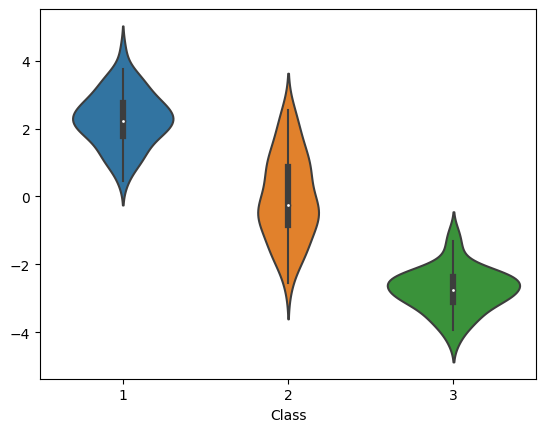

In [187]:
# Create a violin plot of the first principal component
sns.violinplot(x=y, y=X_pca[:, 0])
plt.show()

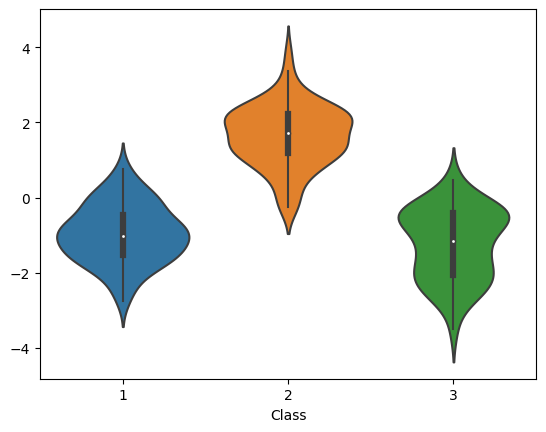

In [184]:
# Create a violin plot of the second principal component
sns.violinplot(x=y, y=X_pca[:, 1])
plt.show()

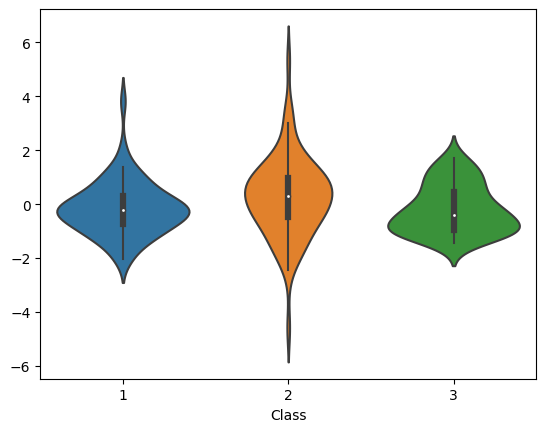

In [188]:
# Create a violin plot of the third principal component
sns.violinplot(x=y, y=X_pca[:, 2])
plt.show()

In [175]:
# Create an instance of the LinearDiscriminantAnalysis class
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the LDA model to the data
lda.fit(X_scaled, y)

# Transform the data using the LDA model
X_lda = lda.transform(X_scaled)

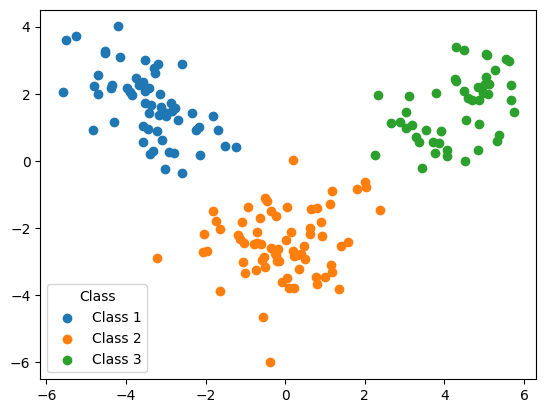

In [176]:
# Create a scatter plot of the transformed data
for label in np.unique(y):
    mask = y == label
    plt.scatter(X_lda[mask, 0], X_lda[mask, 1], label=f'Class {label}')

# Add a legend to the plot
plt.legend(title='Class')

# Show the plot
plt.show()

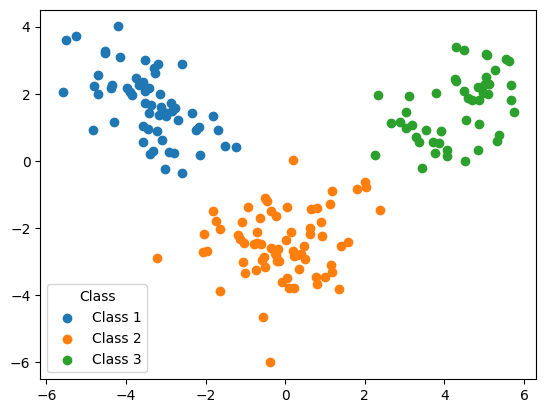

In [177]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
lda = LinearDiscriminantAnalysis(n_components=2)

# Fit the LDA model to the data
lda.fit(X_scaled, y)

# Transform the data using the LDA model
X_lda = lda.transform(X_scaled)
# Create a scatter plot of the transformed data
for label in np.unique(y):
    mask = y == label
    plt.scatter(X_lda[mask, 0], X_lda[mask, 1], label=f'Class {label}')

# Add a legend to the plot
plt.legend(title='Class')

# Show the plot
plt.show()